In [51]:
import matplotlib.pyplot as plt
import re
from pathlib import Path

In [52]:
log_path = r'train_student_log_new_10th.txt'

In [53]:
loss_pattern = 'Step: ([\d]+/[\d]+), batch_cost: ([\d]+.[\d]+), loss: ([\d]+.[\d]+), loss_ori: ([\d]+.[\d]+), loss_kd: ([\d]+.[\d]+) loss_box: ([\d]+.[\d]+) loss_obj: ([\d]+.[\d]+) loss_cls: ([\d]+.[\d]+) ETA'
dataset_path_pattern = 'dataset_path: ([\s\S]*)'
metrices_pattern = 'P: ([\d]+.[\d]+), R: ([\d]+.[\d]+), MAP@5: ([\d]+.[\d]+), MAP@50: ([\d]+.[\d]+)'

In [54]:
steps_log = []
batch_cost_log = []
loss_log = []
loss_yolo_log = []
loss_kd_log = []
loss_bbox_log = []
loss_obj_log = []
loss_cls_log = []
dataset_metrices_dict = {}
dataset_metrices_dict_map50 = {}
with open(log_path, 'r') as f:
    lines = [l.strip() for l in f.readlines()]
    for line in lines:
        m = re.search(loss_pattern, line)
        if m is not None:
            steps_log.append(m.group(1).split('/')[0])
            batch_cost_log.append(m.group(2))
            loss_log.append(m.group(3))
            loss_yolo_log.append(m.group(4))
            loss_kd_log.append(m.group(5))
            loss_bbox_log.append(m.group(6))
            loss_obj_log.append(m.group(7))
            loss_cls_log.append(m.group(8))
            for k in dataset_metrices_dict.keys():
                dataset_metrices_dict_map50[k].append(dataset_metrices_dict[k]["MAP50"][-1])

            continue
        
        dataset_match = re.search(dataset_path_pattern, line)
        if dataset_match is not None:
            dataset_flag = dataset_match.group(1)
            if not dataset_flag in dataset_metrices_dict.keys():
                dataset_metrices_dict[dataset_flag] = {"P":[],"R":[],"MAP50":[],"MAP95":[]}
                dataset_metrices_dict_map50[dataset_flag] = []
            continue
        metrices_match = re.search(metrices_pattern, line)
        if metrices_match is not None and dataset_flag is not None:
            dataset_metrices_dict[dataset_flag]["P"].append(float(metrices_match.group(1)))
            dataset_metrices_dict[dataset_flag]["R"].append(float(metrices_match.group(2)))
            dataset_metrices_dict[dataset_flag]["MAP50"].append(float(metrices_match.group(3)))
            dataset_metrices_dict[dataset_flag]["MAP95"].append(float(metrices_match.group(4)))
            dataset_flag = None
            continue
        
steps_log = list(map(int, steps_log))
batch_cost_log = list(map(float, batch_cost_log))
loss_log = list(map(float, loss_log))
loss_yolo_log = list(map(float, loss_yolo_log))
loss_kd_log = list(map(float, loss_kd_log))
loss_bbox_log = list(map(float, loss_bbox_log))
loss_obj_log = list(map(float, loss_obj_log))
loss_cls_log = list(map(float, loss_cls_log))

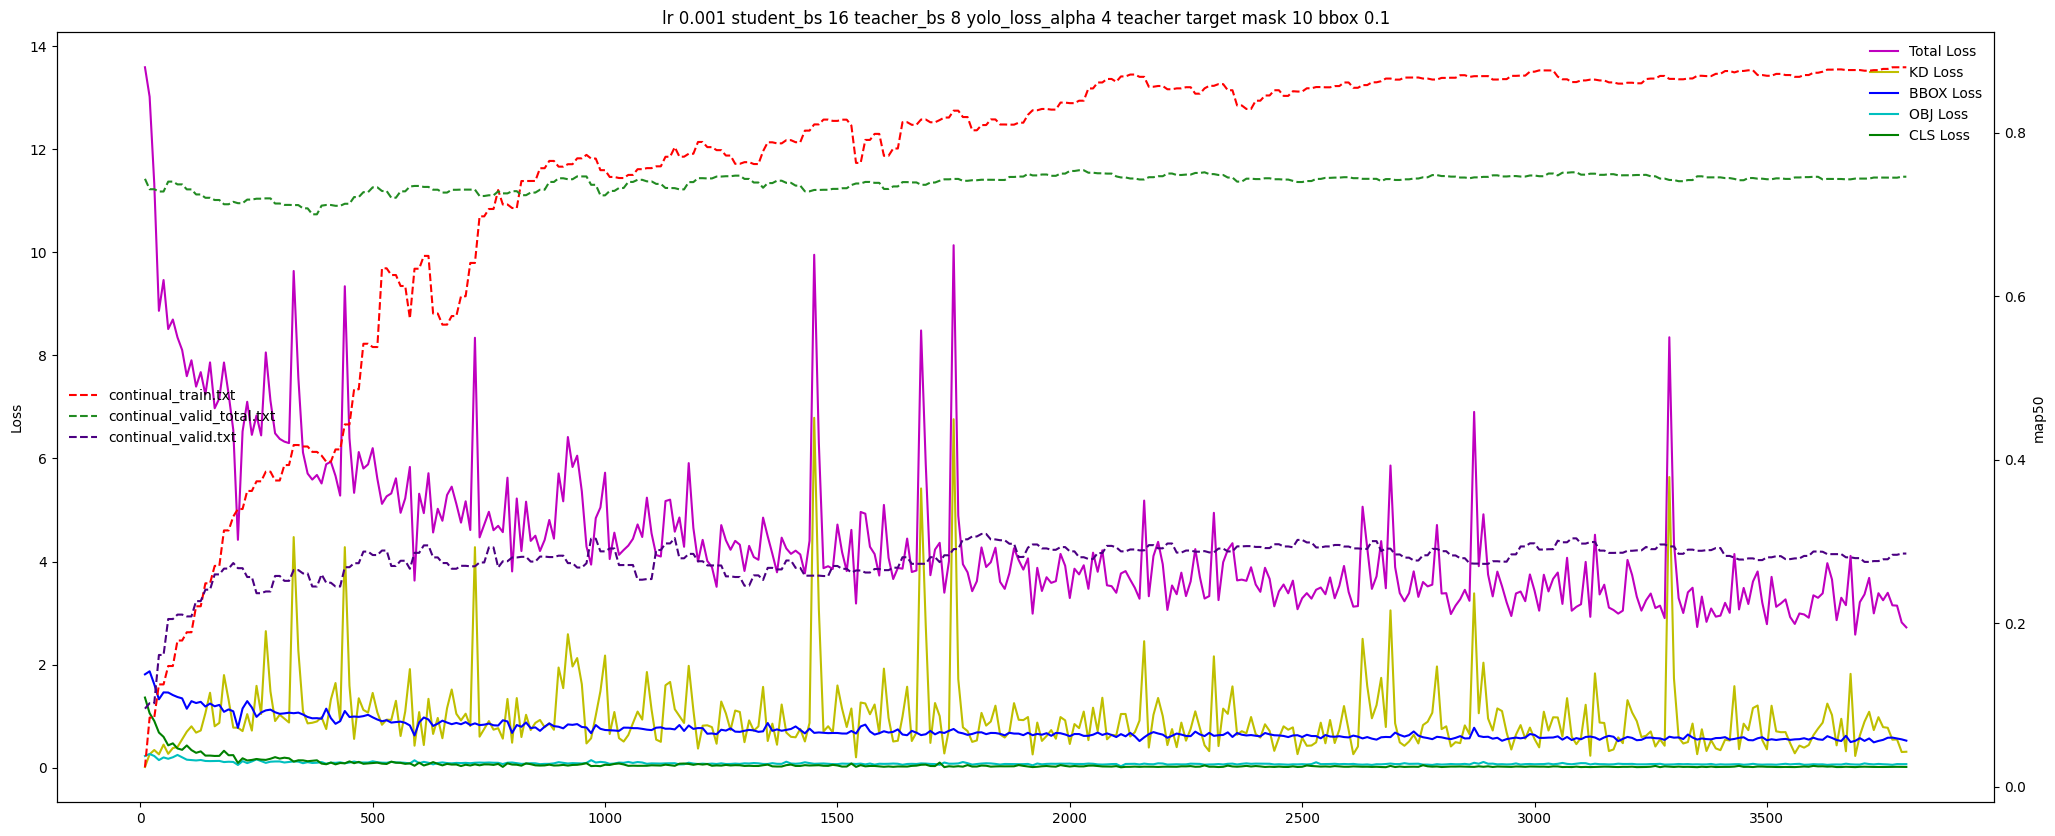

In [55]:

fig, ax1 = plt.subplots(figsize=(25, 10))

loss_line, = ax1.plot(steps_log,loss_log,'m-',)
loss_kd_line, = ax1.plot(steps_log,loss_kd_log,'y-',)
loss_bbox_line, = ax1.plot(steps_log,loss_bbox_log,'b-',)
loss_obj_line, = ax1.plot(steps_log,loss_obj_log,'c-',)
loss_cls_line, = ax1.plot(steps_log,loss_cls_log,'g-',)
ax1.legend([loss_line,loss_kd_line,loss_bbox_line,loss_obj_line,loss_cls_line], ["Total Loss","KD Loss","BBOX Loss","OBJ Loss","CLS Loss"],loc='best',frameon=False)
ax1.set_ylabel("Loss")
# # 创建第二个y轴
ax2 = ax1.twinx()
# # 计算百分比数据
keys_list = list(dataset_metrices_dict_map50.keys())
_0_map50, = ax2.plot(steps_log, dataset_metrices_dict_map50[keys_list[0]], 'r--')
_1_map50, = ax2.plot(steps_log, dataset_metrices_dict_map50[keys_list[1]], color = 'forestgreen', linestyle='dashed')
_2_map50, = ax2.plot(steps_log, dataset_metrices_dict_map50[keys_list[2]], color = 'indigo', linestyle='dashed')
ax2.legend([_0_map50,_1_map50,_2_map50], [Path(k).name for k in keys_list],loc='center left',frameon=False)
ax2.set_ylabel("map50")
# y2_percent = (y2 - np.min(y2)) / (np.max(y2) - np.min(y2)) * 100
# # 绘制百分比曲线
# ax2.plot(x, y2_percent, 'r-')
# ax2.set_ylabel('Percentage Data (%)', color='r')
plt.xlabel("train step")
plt.title("lr 0.001 student_bs 16 teacher_bs 8 yolo_loss_alpha 4 teacher target mask 10 bbox 0.1")
plt.savefig("0427_10th_test.png",dpi=500)
plt.show()

In [160]:
loss_example = 'Step: 3350/3800, batch_cost: 0.5422, loss: 1.3255, loss_ori: 0.5294, loss_kd: 0.2668 loss_box: 0.3991 loss_obj: 0.1159 loss_cls: 0.0144 ETA: 00:08:16'
m = re.search(loss_pattern, loss_example)
if m is None:
    pass
else:
    steps =  m.group(1)
    batch_cost = m.group(2)
    loss = m.group(3)
    loss_yolo = m.group(4)
    loss_kd = m.group(5)
    loss_bbox = m.group(6)
    loss_obj = m.group(7)
    loss_cls = m.group(8)
    print(steps, batch_cost, loss, loss_yolo, loss_kd, loss_bbox, loss_obj, loss_cls)


3350/3800 0.5422 1.3255 0.5294 0.2668 0.3991 0.1159 0.0144


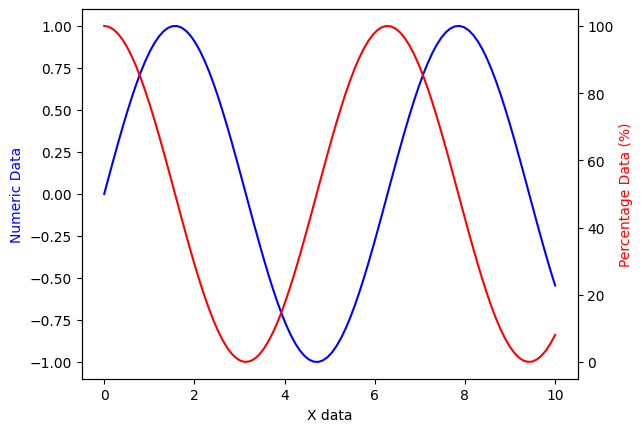

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# 生成示例数据
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# 创建画布和子图
fig, ax1 = plt.subplots()

# 绘制数值曲线
ax1.plot(x, y1, 'b-')
ax1.set_xlabel('X data')
ax1.set_ylabel('Numeric Data', color='b')

# 创建第二个y轴
ax2 = ax1.twinx()
# 计算百分比数据
y2_percent = (y2 - np.min(y2)) / (np.max(y2) - np.min(y2)) * 100
# 绘制百分比曲线
ax2.plot(x, y2_percent, 'r-')
ax2.set_ylabel('Percentage Data (%)', color='r')

plt.show()

In [80]:
(1-0.00375)**500

0.15281542798535572

In [112]:
aaa = """dataset_path: /data4/times-ai-cloud/model/train/shimopian_test6/continual_train.txt
Cost Time 00:00:02
Preds: 293, Labels: 270, P: 0.0437, R: 0.0235, MAP@5: 0.0236, MAP@50: 0.0138
dataset_path: /data4/times-ai-cloud/model/train/shimopian_test6/continual_valid_total.txt
Cost Time 00:00:09
Preds: 1114, Labels: 1697, P: 0.8623, R: 0.7107, MAP@5: 0.7436, MAP@50: 0.4698
dataset_path: /data4/times-ai-cloud/model/train/shimopian_test6/continual_valid.txt
Cost Time 00:00:00
Preds: 58, Labels: 89, P: 0.1277, R: 0.0656, MAP@5: 0.0953, MAP@50: 0.0723
Plotting labels to /data4/times-ai-cloud/model/train/shimopian_test6/student_model9/labels.jpg... 
Image sizes 1024 train, 1024 val
Using 8 dataloader workers
Logging results to [1m/data4/times-ai-cloud/model/train/shimopian_test6/student_model9[0m
Starting training for 200 epochs...
0
Step: 10/3800, batch_cost: 0.6043, loss: 4.9173, loss_ori: 2.4473, loss_kd: 0.0228 loss_box: 0.8965 loss_obj: 0.2249 loss_cls: 1.3259 ETA: 00:57:22
Epoch: 1/200
dataset_path: /data4/times-ai-cloud/model/train/shimopian_test6/continual_train.txt
Cost Time 00:00:03
Preds: 293, Labels: 270, P: 0.1111, R: 0.1428, MAP@5: 0.0860, MAP@50: 0.0425
dataset_path: /data4/times-ai-cloud/model/train/shimopian_test6/continual_valid_total.txt
Cost Time 00:00:07
Preds: 1114, Labels: 1697, P: 0.8459, R: 0.6967, MAP@5: 0.7341, MAP@50: 0.4579
dataset_path: /data4/times-ai-cloud/model/train/shimopian_test6/continual_valid.txt
Cost Time 00:00:00
Preds: 58, Labels: 89, P: 0.0865, R: 0.1477, MAP@5: 0.0994, MAP@50: 0.0624
Epoch: 1/200, dataset_path: /data4/times-ai-cloud/model/train/shimopian_test6/continual_valid_total.txt 
, P: 0.8459, R: 0.6967, MAP@5: 0.7341, MAP@50: 0.4579,                             box_loss:0.0340 , obj_loss:0.0092 , cls_loss:0.0105
Step: 20/3800, batch_cost: 20.8166, loss: 4.4968, loss_ori: 2.1882, loss_kd: 0.1203 loss_box: 0.9428 loss_obj: 0.2699 loss_cls: 0.9756 ETA: 02:01:17
Step: 30/3800, batch_cost: 0.8863, loss: 4.2806, loss_ori: 1.9518, loss_kd: 0.3770 loss_box: 0.8265 loss_obj: 0.2416 loss_cls: 0.8837 ETA: 01:35:48
Epoch: 2/200
dataset_path: /data4/times-ai-cloud/model/train/shimopian_test6/continual_train.txt
Cost Time 00:00:02
Preds: 293, Labels: 270, P: 0.0835, R: 0.2028, MAP@5: 0.0856, MAP@50: 0.0411
dataset_path: /data4/times-ai-cloud/model/train/shimopian_test6/continual_valid_total.txt
Cost Time 00:00:07
Preds: 1114, Labels: 1697, P: 0.8563, R: 0.6942, MAP@5: 0.7393, MAP@50: 0.4521
dataset_path: /data4/times-ai-cloud/model/train/shimopian_test6/continual_valid.txt
Cost Time 00:00:00
Preds: 58, Labels: 89, P: 0.2478, R: 0.0762, MAP@5: 0.1175, MAP@50: 0.0694
Step: 40/3800, batch_cost: 0.8358, loss: 3.5643, loss_ori: 1.5748, loss_kd: 0.4146 loss_box: 0.7304 loss_obj: 0.1598 loss_cls: 0.6847 ETA: 01:39:04
Step: 50/3800, batch_cost: 1.0624, loss: 3.9644, loss_ori: 1.6625, loss_kd: 0.6393 loss_box: 0.7732 loss_obj: 0.2271 loss_cls: 0.6622 ETA: 01:27:37
Epoch: 3/200"""

In [113]:
dataset_path_pattern = 'dataset_path: ([\s\S]*)'
metrices_pattern = 'P: ([\d]+.[\d]+), R: ([\d]+.[\d]+), MAP@5: ([\d]+.[\d]+), MAP@50: ([\d]+.[\d]+)'
dataset_metrices_dict = {}
for l in aaa.split('\n'):
    dataset_match = re.search(dataset_path_pattern, l)
    if dataset_match is not None:
        dataset_flag = dataset_match.group(1)
        if not dataset_flag in dataset_metrices_dict.keys():
            dataset_metrices_dict[dataset_flag] = {"P":[],"R":[],"MAP50":[],"MAP95":[]}
        continue
    metrices_match = re.search(metrices_pattern, l)
    if metrices_match is not None and dataset_flag is not None:
        dataset_metrices_dict[dataset_flag]["P"].append(float(metrices_match.group(1)))
        dataset_metrices_dict[dataset_flag]["R"].append(float(metrices_match.group(2)))
        dataset_metrices_dict[dataset_flag]["MAP50"].append(float(metrices_match.group(3)))
        dataset_metrices_dict[dataset_flag]["MAP95"].append(float(metrices_match.group(4)))
        dataset_flag = None
        continue

In [114]:
dataset_metrices_dict

{'/data4/times-ai-cloud/model/train/shimopian_test6/continual_train.txt': {'P': [0.0437,
   0.1111,
   0.0835],
  'R': [0.0235, 0.1428, 0.2028],
  'MAP50': [0.0236, 0.086, 0.0856],
  'MAP95': [0.0138, 0.0425, 0.0411]},
 '/data4/times-ai-cloud/model/train/shimopian_test6/continual_valid_total.txt': {'P': [0.8623,
   0.8459,
   0.8563],
  'R': [0.7107, 0.6967, 0.6942],
  'MAP50': [0.7436, 0.7341, 0.7393],
  'MAP95': [0.4698, 0.4579, 0.4521]},
 '/data4/times-ai-cloud/model/train/shimopian_test6/continual_valid.txt': {'P': [0.1277,
   0.0865,
   0.2478],
  'R': [0.0656, 0.1477, 0.0762],
  'MAP50': [0.0953, 0.0994, 0.1175],
  'MAP95': [0.0723, 0.0624, 0.0694]},
 '/data4/times-ai-cloud/model/train/shimopian_test6/continual_valid_total.txt ': {'P': [0.8459],
  'R': [0.6967],
  'MAP50': [0.7341],
  'MAP95': [0.4579]}}

In [1]:
import torch

c:\Users\dyj\.conda\envs\test2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
a = torch.randn((5,6))
b = torch.randn((2,6))
c = torch.concat((a, b))
c.shape
a,b,c

(tensor([[ 2.3482,  0.7551, -2.1519, -0.4393,  0.7999, -1.1399],
         [-2.3820,  0.2740,  0.5763,  0.0125, -0.4807,  1.3806],
         [-0.2010,  1.1434, -0.4622, -0.1541,  1.3556,  0.2483],
         [-0.5787,  0.4101,  1.2085,  1.0334,  0.0357,  0.1719],
         [ 0.3744,  0.3691, -1.1424, -0.6376,  0.1299, -1.2588]]),
 tensor([[-2.0392,  0.8040, -0.7905,  1.5979, -1.5150,  2.0818],
         [ 1.0487, -1.3128, -0.9543,  2.2753,  0.1449,  1.1046]]),
 tensor([[ 2.3482,  0.7551, -2.1519, -0.4393,  0.7999, -1.1399],
         [-2.3820,  0.2740,  0.5763,  0.0125, -0.4807,  1.3806],
         [-0.2010,  1.1434, -0.4622, -0.1541,  1.3556,  0.2483],
         [-0.5787,  0.4101,  1.2085,  1.0334,  0.0357,  0.1719],
         [ 0.3744,  0.3691, -1.1424, -0.6376,  0.1299, -1.2588],
         [-2.0392,  0.8040, -0.7905,  1.5979, -1.5150,  2.0818],
         [ 1.0487, -1.3128, -0.9543,  2.2753,  0.1449,  1.1046]]))

In [12]:
a.repeat(3,1,1).shape

torch.Size([3, 5, 6])

In [13]:
ai = torch.arange(3).view(3,1).repeat(1,5)
ai.shape,ai

(torch.Size([3, 5]),
 tensor([[0, 0, 0, 0, 0],
         [1, 1, 1, 1, 1],
         [2, 2, 2, 2, 2]]))

In [14]:
ai[..., None].shape

torch.Size([3, 5, 1])

In [16]:
dd = torch.cat((a.repeat(3, 1, 1), ai[..., None]), 2)
dd.shape, dd

(torch.Size([3, 5, 7]),
 tensor([[[ 2.3482,  0.7551, -2.1519, -0.4393,  0.7999, -1.1399,  0.0000],
          [-2.3820,  0.2740,  0.5763,  0.0125, -0.4807,  1.3806,  0.0000],
          [-0.2010,  1.1434, -0.4622, -0.1541,  1.3556,  0.2483,  0.0000],
          [-0.5787,  0.4101,  1.2085,  1.0334,  0.0357,  0.1719,  0.0000],
          [ 0.3744,  0.3691, -1.1424, -0.6376,  0.1299, -1.2588,  0.0000]],
 
         [[ 2.3482,  0.7551, -2.1519, -0.4393,  0.7999, -1.1399,  1.0000],
          [-2.3820,  0.2740,  0.5763,  0.0125, -0.4807,  1.3806,  1.0000],
          [-0.2010,  1.1434, -0.4622, -0.1541,  1.3556,  0.2483,  1.0000],
          [-0.5787,  0.4101,  1.2085,  1.0334,  0.0357,  0.1719,  1.0000],
          [ 0.3744,  0.3691, -1.1424, -0.6376,  0.1299, -1.2588,  1.0000]],
 
         [[ 2.3482,  0.7551, -2.1519, -0.4393,  0.7999, -1.1399,  2.0000],
          [-2.3820,  0.2740,  0.5763,  0.0125, -0.4807,  1.3806,  2.0000],
          [-0.2010,  1.1434, -0.4622, -0.1541,  1.3556,  0.2483,  2.00

In [18]:
torch.tensor(torch.randn(1,3,20,20,85).shape)[[3, 2, 3, 2]]  # xyxy gain

tensor([20, 20, 20, 20])

In [19]:
gain = torch.ones(7)  # normalized to gridspace gain
gain[2:6] = torch.tensor(torch.randn(1,3,20,20,85).shape)[[3, 2, 3, 2]]  # xyxy gain
gain

tensor([ 1.,  1., 20., 20., 20., 20.,  1.])

In [34]:
t = dd * gain

In [35]:
t

tensor([[[  2.3482,   0.7551, -43.0387,  -8.7866,  15.9974, -22.7971,   0.0000],
         [ -2.3820,   0.2740,  11.5268,   0.2493,  -9.6146,  27.6120,   0.0000],
         [ -0.2010,   1.1434,  -9.2435,  -3.0814,  27.1115,   4.9655,   0.0000],
         [ -0.5787,   0.4101,  24.1710,  20.6673,   0.7147,   3.4370,   0.0000],
         [  0.3744,   0.3691, -22.8487, -12.7511,   2.5973, -25.1766,   0.0000]],

        [[  2.3482,   0.7551, -43.0387,  -8.7866,  15.9974, -22.7971,   1.0000],
         [ -2.3820,   0.2740,  11.5268,   0.2493,  -9.6146,  27.6120,   1.0000],
         [ -0.2010,   1.1434,  -9.2435,  -3.0814,  27.1115,   4.9655,   1.0000],
         [ -0.5787,   0.4101,  24.1710,  20.6673,   0.7147,   3.4370,   1.0000],
         [  0.3744,   0.3691, -22.8487, -12.7511,   2.5973, -25.1766,   1.0000]],

        [[  2.3482,   0.7551, -43.0387,  -8.7866,  15.9974, -22.7971,   2.0000],
         [ -2.3820,   0.2740,  11.5268,   0.2493,  -9.6146,  27.6120,   2.0000],
         [ -0.2010,   1.

In [36]:
r = t[..., 4:6]

In [37]:
j = torch.max(r, 1/r).max(2)[0] < 5
j

tensor([[False, False, False,  True,  True],
        [False, False, False,  True,  True],
        [False, False, False,  True,  True]])

In [38]:
t1 = t[j]
t1

tensor([[ -0.5787,   0.4101,  24.1710,  20.6673,   0.7147,   3.4370,   0.0000],
        [  0.3744,   0.3691, -22.8487, -12.7511,   2.5973, -25.1766,   0.0000],
        [ -0.5787,   0.4101,  24.1710,  20.6673,   0.7147,   3.4370,   1.0000],
        [  0.3744,   0.3691, -22.8487, -12.7511,   2.5973, -25.1766,   1.0000],
        [ -0.5787,   0.4101,  24.1710,  20.6673,   0.7147,   3.4370,   2.0000],
        [  0.3744,   0.3691, -22.8487, -12.7511,   2.5973, -25.1766,   2.0000]])